In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import classification_report
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'Arial'

In [122]:
trainresult = pd.read_csv('./DeepSP/trainresult.csv')
trainresult.shape

(579, 16)

In [123]:
print(classification_report(trainresult.markers, trainresult.pred, digits=3))

                   precision    recall  f1-score   support

          CYTOSOL      1.000     1.000     1.000        49
               ER      1.000     1.000     1.000        82
               GA      1.000     1.000     1.000        34
         LYSOSOME      1.000     1.000     1.000        35
    MITOCHONDRION      1.000     1.000     1.000       122
NUCLEUS/CHROMATIN      1.000     0.989     0.995        94
       PEROXISOME      1.000     1.000     1.000        14
               PM      1.000     1.000     1.000        56
       PROTEASOME      1.000     1.000     1.000        26
         RIBOSOME      0.985     1.000     0.993        67

         accuracy                          0.998       579
        macro avg      0.999     0.999     0.999       579
     weighted avg      0.998     0.998     0.998       579



In [124]:
DeepSPtest = pd.read_csv('./DeepSP/testresult.csv', index_col=0)[['pred','score',]]
DeepSPtest.columns = ['DeepSPClassification','DeepSPScore']
DeepSPtest.shape

(6258, 2)

In [125]:
dfsvm = pd.read_csv('./LOPITDC2019SVMClassification.csv', index_col=0)
dfsvm.head(1)

,P1rep1,P2rep1,P3rep1,P4rep1,P5rep1,P6rep1,P7rep1,P8rep1,P9rep1,SNrep1,...,P4rep3,P5rep3,P6rep3,P7rep3,P8rep3,P9rep3,SNrep3,markers,SVMClassification,SVMScore
P09382,0.084,0.116,0.099,0.09,0.089,0.072,0.057,0.051,0.066,0.252,...,0.103,0.076,0.08,0.061,0.058,0.054,0.228,unknown,CYTOSOL,0.587467


In [126]:
# dfnnet = pd.read_csv('./LOPITDC2019NNETClassification.csv', index_col=0)[['NNETClassification', 'NNETScore']]
# dfnnet.head(1)

In [135]:
df = pd.concat([dfsvm, dfnnet, DeepSPtest], axis=1)
df.index.name = 'ProteinID'
df.loc[df['DeepSPClassification'].isna(), 'DeepSPClassification'] = df.loc[df['DeepSPClassification'].isna(), 'markers']
df.loc[df['DeepSPScore'].isna(), 'DeepSPScore'] = 1.0
df = df.rename(index={'Q7Z412-2': 'Q7Z412'})

In [136]:
df.to_csv('../LOPITDC2019/LOPITDC2019SVM_DeepSP.csv')

In [137]:
df.head(1)

,P1rep1,P2rep1,P3rep1,P4rep1,P5rep1,P6rep1,P7rep1,P8rep1,P9rep1,SNrep1,...,P8rep3,P9rep3,SNrep3,markers,SVMClassification,SVMScore,NNETClassification,NNETScore,DeepSPClassification,DeepSPScore
ProteinID,,,,,,,,,,,,,,,,,,,,,
P09382,0.084,0.116,0.099,0.09,0.089,0.072,0.057,0.051,0.066,0.252,...,0.058,0.054,0.228,unknown,CYTOSOL,0.587467,CYTOSOL,0.988495,CYTOSOL,0.467315


In [138]:
result = df[df['markers'] == 'unknown']
result.shape

(6258, 37)

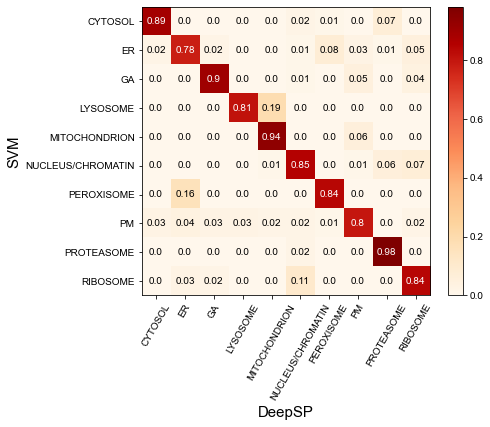

In [139]:
skplt.metrics.plot_confusion_matrix(result['SVMClassification'],
                                    result['DeepSPClassification'],
                                    normalize=True,
                                   figsize=(6*1.2, 5*1.2),
                                   cmap='OrRd')
plt.xticks(rotation=60)

plt.xlabel('DeepSP', fontsize=15)
plt.ylabel('SVM', fontsize=15)
plt.title(None)
plt.tight_layout()
plt.savefig('../figure/LOPITDC2019_SVMvsDeepSP.pdf')

In [132]:
# skplt.metrics.plot_confusion_matrix(result['NNETClassification'],
#                                     result['DeepSPClassification'],
#                                     normalize=True,
#                                    figsize=(6*1.2, 5*1.2),
#                                    cmap='OrRd')
# plt.xticks(rotation=60)

# plt.xlabel('DeepSP', fontsize=15)
# plt.ylabel('NNET', fontsize=15)
# plt.title(None)
# plt.tight_layout()
# plt.savefig('../figure/LOPITDC2019_NNETvsDeepSP.pdf')

In [111]:
# result[result['NNETClassification'] != result['DeepSPClassification']][[
#     'NNETClassification', 'NNETScore', 'DeepSPClassification', 'DeepSPScore' 
# ]].to_csv('../LOPITDC2019/LOPITDC2019Diff_NNET-DeepSP.csv')

In [140]:
result[result['SVMClassification'] != result['DeepSPClassification']][[
    'SVMClassification', 'SVMScore', 'DeepSPClassification', 'DeepSPScore' 
]].to_csv(
    '../LOPITDC2019/LOPITDC2019Diff_SVM-DeepSP.csv')